# K-MEANS Clasificación y Agrupación 🤠 

<br><b>Creador:</b> Norma Yuliana Cala Martínez
<br><b>Email: </b> normisss11@gmail.com
<br><b>Fecha creacion:</b> Octubre 17, 2020

<img src='kmeans.png'>

## Taller  🎖

### PARTE 1 CLASIFICACIÓN

#### Punto 1 Datos
    a. Dividir el conjunto de datos en entrenamiento y prueba
#### Punto 2 Procesar
    a. Hacer pre-procesamiento del texto    
#### Punto 3 : Entrenar 
    Nota:  Puedes escoger el modelo que quieras: Regresión Logística, Naive-Bayes, SVM, u otro.    
#### Punto 4 : Métricas de evaluación
    a. Exactitud, precisión y sensibilidad
    b. BONUS -- Matriz de confusión
    c. BONUS -- Términos más importantes de cada categoría
    
    
### PARTE 2 AGRUPACIÓN 

#### Punto 1 
    a. Hacer pre-procesamiento del texto
#### Punto 2
    a.Método del codo para determinar  𝐾    
#### Punto 3: Entrenar modelo con el  𝐾  escogido
    a. BONUS -- Visualización usando PCA


### PARTE 3 COMPARACIÓN

#### Punto 1
    Hacer predicción para estas dos frases de los dos modelos
#### Punto 2: Preguntas

    a. ¿A cuál modelo le fue mejor?
    b. ¿Cuál modelo se demoró más en entrenar?
    c. Según los resultados del  𝐾 -Means, ¿cuál es la estructura latente de los datos?
    d. ¿Alguna otra observación?

## 🍯 Solución de taller

##### Cargar Librerías importantes.

In [1]:
import re
import json
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

import time

In [2]:
# Cargar datos
path = 'Taller/reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### 🎯 PARTE 1  Clasificación

### 😲 Punto 1 
    a. Dividir el conjunto de datos en entrenamiento y prueba

In [3]:
train, test = train_test_split(data, test_size=0.2, random_state=50) 
print(f"El conjunto de datos de entrenamiento tiene {train.shape[0]} registros")
print(f"El conjunto de datos de prueba tiene {test.shape[0]} registros")

El conjunto de datos de entrenamiento tiene 800 registros
El conjunto de datos de prueba tiene 200 registros


### 😲 Punto 2 Procesar
    a. Hacer pre-procesamiento del texto   

In [4]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [5]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values
 
X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

### 😲 Punto 3 : Entrenar 
    Nota:  Puedes escoger el modelo que quieras: Regresión Logística, Naive-Bayes, SVM, u otro.    

In [6]:
# Inicializamos los clasificadores
logreg = LogisticRegression(class_weight='balanced')

In [7]:
# Entrenamos los modelos
start_time = time.time()
logreg.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.025930404663085938 seconds ---


### 😲 Punto 4 : Métricas de evaluación
    a. Exactitud, precisión y sensibilidad

In [8]:
# Hacemos las predicciones para los datos de prueba (test)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg

array(['video_games', 'video_games', 'video_games', 'jewelry',
       'video_games', 'jewelry', 'jewelry', 'video_games', 'jewelry',
       'jewelry', 'jewelry', 'video_games', 'video_games', 'video_games',
       'video_games', 'jewelry', 'video_games', 'video_games', 'jewelry',
       'video_games', 'jewelry', 'video_games', 'video_games', 'jewelry',
       'video_games', 'video_games', 'jewelry', 'jewelry', 'jewelry',
       'jewelry', 'jewelry', 'jewelry', 'jewelry', 'jewelry', 'jewelry',
       'jewelry', 'video_games', 'video_games', 'jewelry', 'jewelry',
       'jewelry', 'jewelry', 'video_games', 'video_games', 'video_games',
       'video_games', 'jewelry', 'video_games', 'video_games',
       'video_games', 'video_games', 'jewelry', 'video_games', 'jewelry',
       'jewelry', 'jewelry', 'video_games', 'video_games', 'jewelry',
       'jewelry', 'jewelry', 'jewelry', 'jewelry', 'video_games',
       'video_games', 'jewelry', 'video_games', 'jewelry', 'jewelry',
       'jewelry

In [9]:
# Resultados del modelo
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")

Regresión Logística:    0.80


In [10]:
# Otras métricas
metricas = [precision_score, recall_score, f1_score]
 
for metrica in metricas:
    print(metrica.__name__)    
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='jewelry'):>7.2f}")
    print()

precision_score
Regresión Logística:    0.76

recall_score
Regresión Logística:    0.79

f1_score
Regresión Logística:    0.77



    b. BONUS -- Matriz de confusión


Text(0.5, 1.0, 'Logistic Regression ')

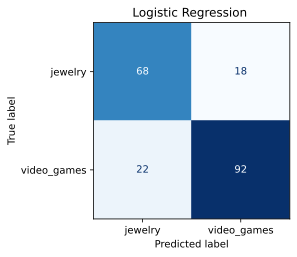

In [11]:
# Visuallizacion
%config InlineBackend.figure_format = 'svg'
 
fig = plt.figure(figsize=(15,15))
 
ax1 = fig.add_subplot(1,3,1)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax1).im_.colorbar.remove() # Le pasamos el modelo xy de la preuba
plt.title("Logistic Regression ")

    c. BONUS -- Términos más importantes de cada categoría

### 🎯 PARTE 2 Agrupación

### 😲 Punto 1 
    a. Hacer pre-procesamiento del texto

In [12]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    return texto
 
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())

### 😲 Punto 2
    a.Método del codo para determinar  𝐾   

Calculando para k=1
Calculando para k=2
Calculando para k=3


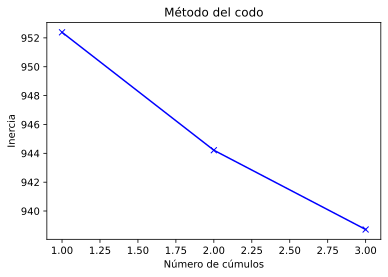

In [13]:
# Método del codo (Mirar gráfica)
ks = []
k_inertia = []

for k in range(1,4): # Depende de los grupos le enviamos a procesar. Tenemos 2 grupos 
    print(f"Calculando para k={k}")
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks.append(k)
    k_inertia.append(kmeans.inertia_)
    
plt.xlabel('Número de cúmulos')
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertia, 'bx-')

### 😲 Punto 3: Entrenar modelo con el  𝐾  escogido
    a. BONUS -- Visualización usando PCA

In [14]:
k = 2
model = KMeans(n_clusters=k)

start_time = time.time()
model.fit(tfidf_matrix)
print("--- %s seconds ---" % (time.time() - start_time))

# Muestra los datos o centroides más cercanos.
nbrs = NearestNeighbors(n_neighbors=5, metric="euclidean").fit(tfidf_matrix.values)

--- 1.3094944953918457 seconds ---


In [15]:
# Divide en Clusters la información.
data['cluster'] = model.labels_
clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True) 

centroides = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names() 

print(f"CLUSTERS:\n")
for i in range(k):
    print(f"Cluster #{i}")
    print(f"{clust_cnt[i]} textos ({clust_cnt_pct[i]:.2%} de los datos)")
    print(f"TERMINOS: ", end=" ")
    for idx in order_centroids[i, :15]:
        print(f"{terms[idx]}", end=" ")
    print("\n")
    print(f"Textos Representativos")
    for texto in data.iloc[nbrs.kneighbors([centroides[i]])[1][0]]['product_category'].values:
        print(f"* {texto}")
    print("\n")

CLUSTERS:

Cluster #0
473 textos (47.30% de los datos)
TERMINOS:  muy de la en calidad un el se pero es son para bien los con 

Textos Representativos
* jewelry
* jewelry
* jewelry
* jewelry
* video_games


Cluster #1
527 textos (52.70% de los datos)
TERMINOS:  que no el la de me es lo en se para un ha pero por 

Textos Representativos
* jewelry
* video_games
* video_games
* jewelry
* video_games




In [16]:
clusters = {0:'video_games',
            1:'jewelry'} 

data['cluster_name'] = data['cluster'].apply(lambda val: clusters[val])
data['texto_peq'] = data['product_category'].apply(lambda texto: texto[:100])

data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster,cluster_name,texto_peq
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,0,video_games,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,0,video_games,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,1,jewelry,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,0,video_games,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,0,video_games,video_games
...,...,...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,1,jewelry,jewelry
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,0,video_games,jewelry
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,0,video_games,jewelry
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,1,jewelry,video_games


### 🎯 PARTE 3

### 😲 Punto 1
    Hacer predicción para estas dos frases de los dos modelos

In [22]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
# transformar con tfidf usado para clasificación
# transformar con tfidf usado para agrupación

nuevo_trans = tfidf_vect.transform(test)
print(clusters[model.predict(nuevo_trans)[0]])
print(clusters[model.predict(nuevo_trans)[1]])

# resultado para clasificación
# resultado para agrupación

video_games
video_games


In [ ]:
# Graficando los datos del modelo.
pca = PCA(n_components=2)
 
result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.texto_peq.values 

trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['cluster'].values)) 

layout = go.Layout(title="GRAFICANDO EL MODELO CON SUS AGRUPACIONES") 

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [ ]:
model.get_params()

### 😲 Punto 2: Preguntas
    a. ¿A cuál modelo le fue mejor?

    b. ¿Cuál modelo se demoró más en entrenar?


In [ ]:
El modelo que más se demoró fue el k-means 0.77 seconds vs 0.41 seconds el de regresión loguistica.


    c. Según los resultados del  𝐾 -Means, ¿cuál es la estructura latente de los datos?


    d. ¿Alguna otra observación?